In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
titanic_data = pd.read_csv("C:/Users/Gabor/egyetem/5felev_20_21_osz/bigData/gyak8/titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

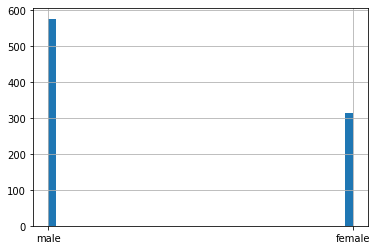

In [5]:
titanic_data.Sex.hist(bins=40)

<AxesSubplot:>

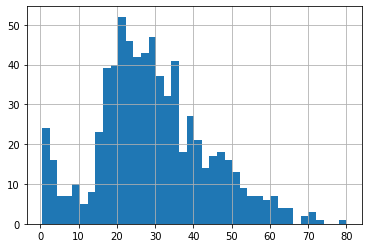

In [6]:
titanic_data.Age.hist(bins=40)

<AxesSubplot:>

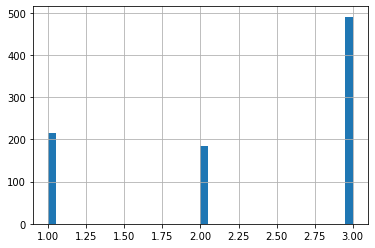

In [7]:
titanic_data.Pclass.hist(bins=40)

<AxesSubplot:xlabel='Sex'>

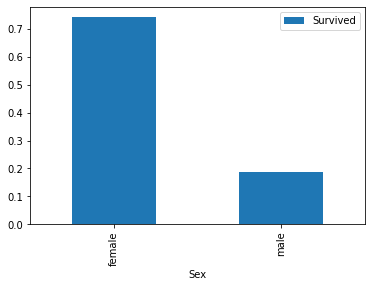

In [8]:
pivot_sex = titanic_data.pivot_table(index="Sex",values="Survived")
pivot_sex.plot.bar()

<AxesSubplot:xlabel='Pclass'>

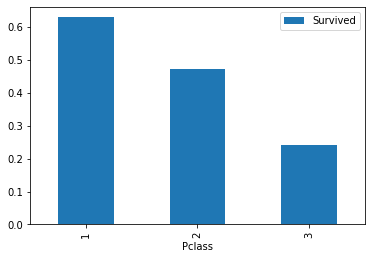

In [9]:
pclass_sex = titanic_data.pivot_table(index="Pclass",values="Survived")
pclass_sex.plot.bar()

<AxesSubplot:xlabel='Age'>

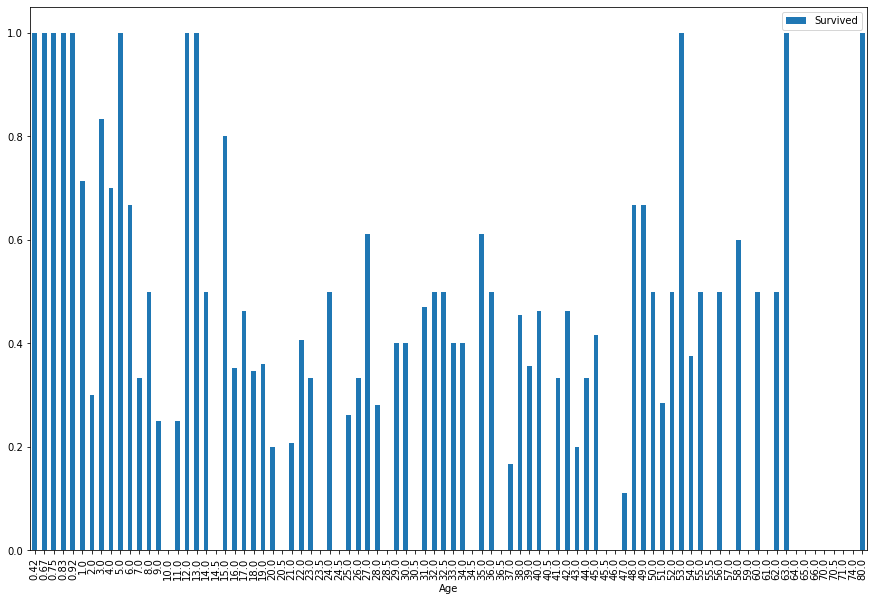

In [10]:
age_sex = titanic_data.pivot_table(index="Age",values="Survived")
age_sex.plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='Pclass'>

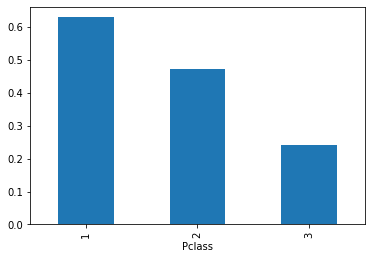

In [11]:
group_pclass = titanic_data.groupby("Pclass").mean()['Survived']
group_pclass.plot.bar()

In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanic_data['Age'].fillna(titanic_data['Age'].mean() + (np.random.rand()*30*2)-30  , inplace=True)

In [14]:
(np.random.rand()*30*2)-30

-21.36487996455181

In [15]:
titanic_data['Age'].mean()

31.27748820855884

<AxesSubplot:>

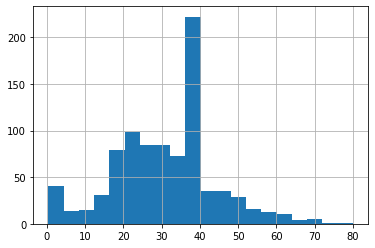

In [16]:
titanic_data.Age.hist(bins=20)
#titanic_data.median()

In [17]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
titanic_data['Sex'] = titanic_data['Sex'].apply(lambda x: 0 if x=='male' else 1)

In [19]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [20]:
dummies1 = pd.get_dummies(titanic_data['Pclass'],prefix="Pclass")
dummies1.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [21]:
dummies2 = pd.get_dummies(titanic_data['Embarked'],prefix="Embarked")
dummies2.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [22]:
titanic_data2 = pd.concat([titanic_data,dummies1,dummies2],axis=1)
titanic_data2 = titanic_data2.drop('Pclass',axis=1)
titanic_data2 = titanic_data2.drop('Embarked',axis=1)

In [23]:
titanic_data2.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1


In [24]:
from sklearn.model_selection import train_test_split

#version1
train, test = train_test_split(titanic_data2,test_size=0.2)

#version2
msk = np.random.rand(len(titanic_data2))> 0.2
train2 = titanic_data2[msk]
test2 = titanic_data2[~msk]

print(train.shape)
print(test.shape)
print(train2.shape)
print(test2.shape)

(712, 16)
(179, 16)
(692, 16)
(199, 16)


In [25]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [26]:
features = ['Age','Sex','Pclass_1','Pclass_2','Pclass_3','SibSp','Parch','Embarked_C','Embarked_Q', 'Embarked_S']

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(train[features].values, train['Survived'].values)

DecisionTreeClassifier(max_depth=3)

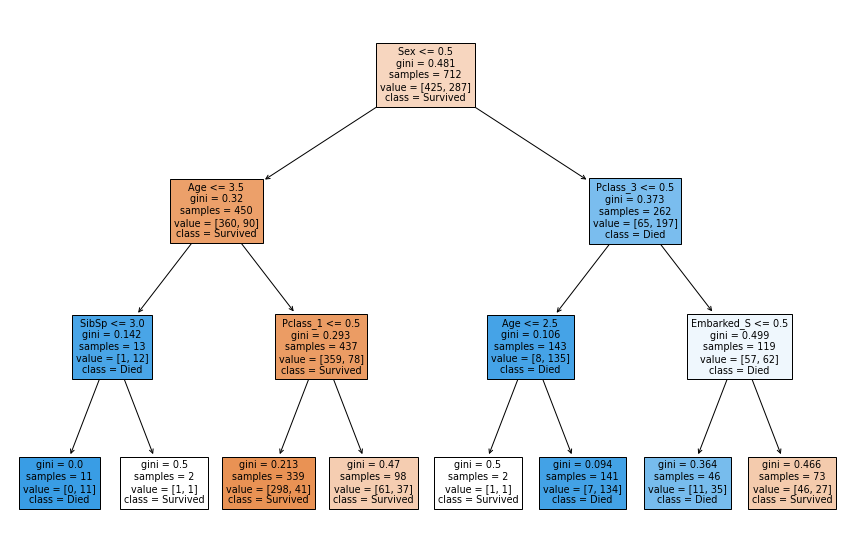

In [27]:
plt.figure(figsize=(15,10))
_ = plot_tree(clf, feature_names=features, class_names=['Survived','Died'],filled=True)

In [28]:
pred_test = clf.predict(test[features].values)
pred_test

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [29]:
from sklearn import metrics as ms

print("Accuracy: ", ms.accuracy_score(test['Survived'].values,pred_test))

Accuracy:  0.8212290502793296


In [30]:
from sklearn.model_selection import cross_val_score

pred_test = clf.predict(test[features].values)

scores = cross_val_score(clf,titanic_data2[features],titanic_data2['Survived'], cv=10)
scores.sort()
accuracy=scores.mean()

print(scores)
print(accuracy)

[0.76404494 0.76404494 0.78651685 0.79775281 0.79775281 0.80898876
 0.82222222 0.85393258 0.85393258 0.87640449]
0.8125593008739077


In [31]:
print("Az uj gepen is lefutott")

Az uj gepen is lefutott
